In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

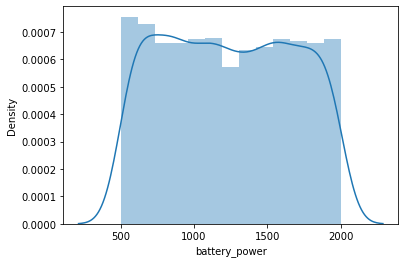

In [7]:
sns.distplot(df['battery_power']);

In [8]:
df['battery_power'].mean()

1238.5185

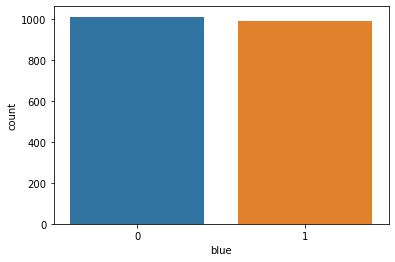

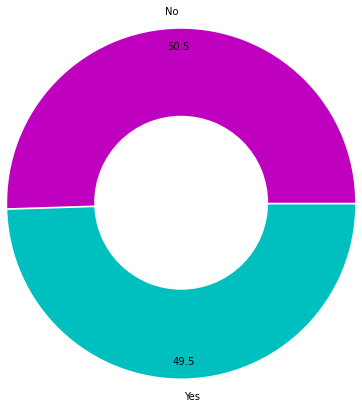

In [9]:
sns.countplot(df['blue'])
plt.show()
plt.pie(x=df['blue'].value_counts(),labels =(['No','Yes']),radius=2,colors=['m','c'],autopct='%.1f',pctdistance=0.9,explode=(0, 0.02));
plt.pie([1],colors='w',radius=1);

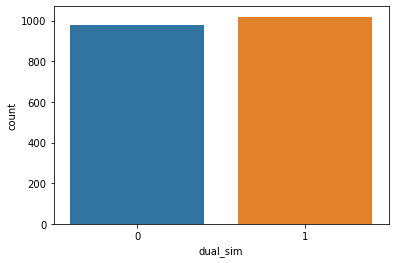

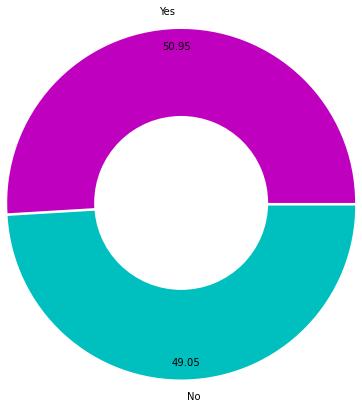

In [10]:
sns.countplot(df['dual_sim']);
plt.show()
df['dual_sim'].value_counts()
plt.pie(x=df['dual_sim'].value_counts(),labels=['Yes','No'],radius=2,colors=['m','c'],autopct='%.2f',pctdistance=0.9,explode=(0, 0.03));
plt.pie([1],colors='w',radius=1);

<AxesSubplot:xlabel='fc', ylabel='count'>

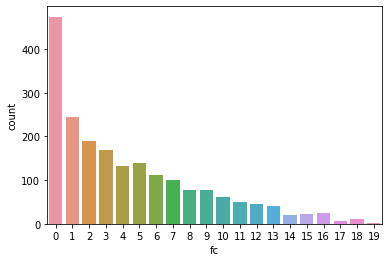

In [11]:
sns.countplot(df['fc'])

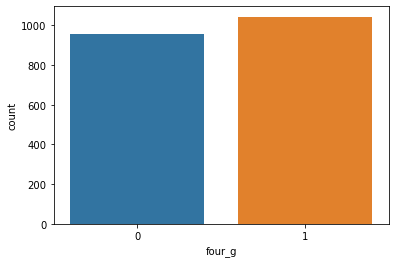

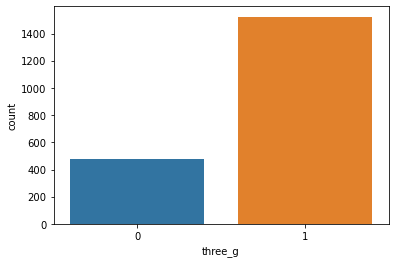

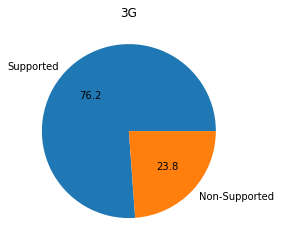

Text(0.5, 1.0, '4G')

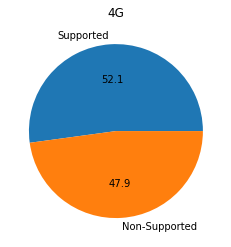

In [12]:
sns.countplot(df['four_g'])
plt.show()
sns.countplot(df['three_g'])
plt.show()
plt.pie(x=df['three_g'].value_counts(),labels=(['Supported','Non-Supported']),autopct='%.1f');
plt.title('3G')
plt.show()
plt.pie(x=df['four_g'].value_counts(),labels=(['Supported','Non-Supported']),autopct='%.1f');
plt.title('4G')

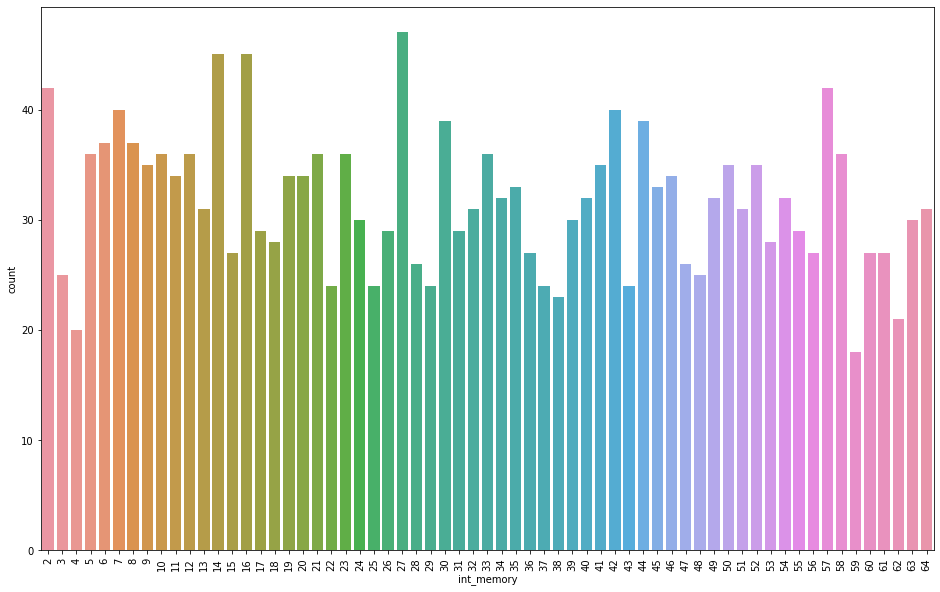

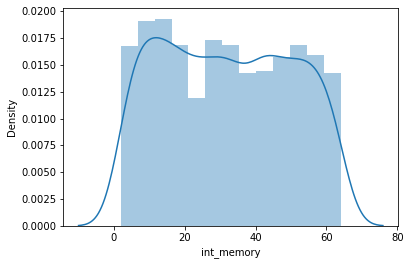

In [13]:
plt.subplots(figsize=(16,10))
sns.countplot(df['int_memory']);
plt.xticks(rotation=90);
plt.show()
sns.distplot(df['int_memory']);

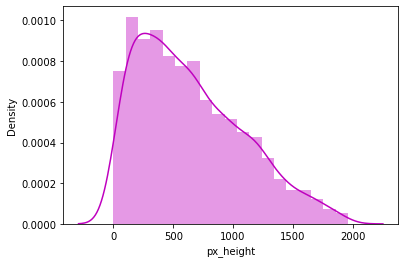

In [15]:
sns.distplot(df['px_height'],color='m');

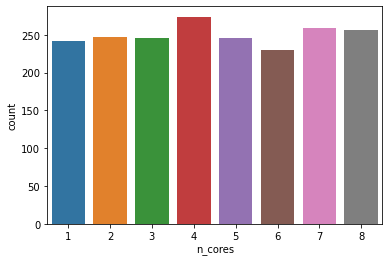

In [16]:
cores = sns.countplot(df['n_cores']);

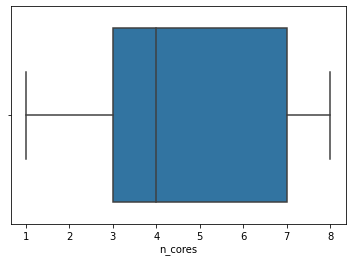

In [17]:
sns.boxplot(df['n_cores']);

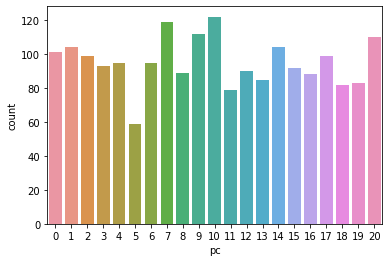

In [18]:
sns.countplot(df['pc']);

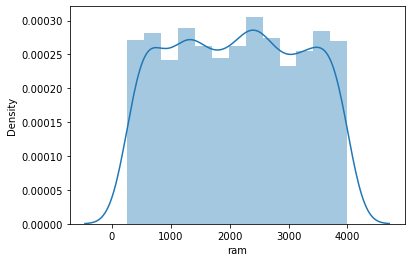

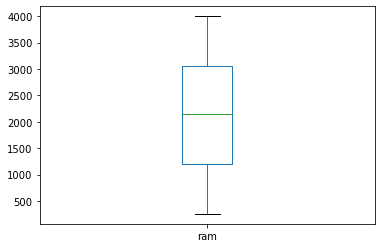

In [40]:
sns.distplot(df['ram']);
plt.show()
df['ram'].plot.box();

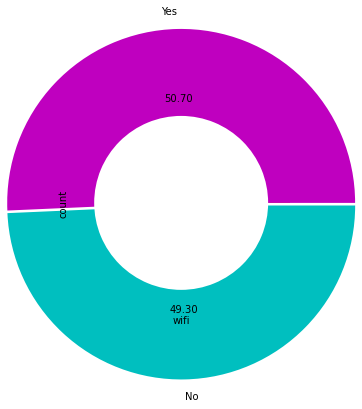

In [53]:
sns.countplot(df['wifi'])
plt.pie(x=df['wifi'].value_counts(),labels=['Yes','No'],radius=2,explode=(0,0.03),colors=['m','c'],autopct='%.2f');
plt.pie([1],colors='w',radius=1);

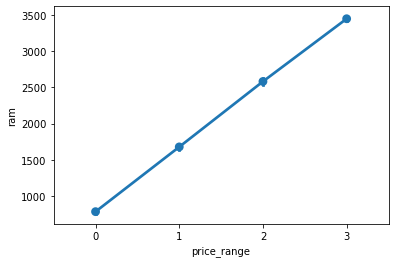

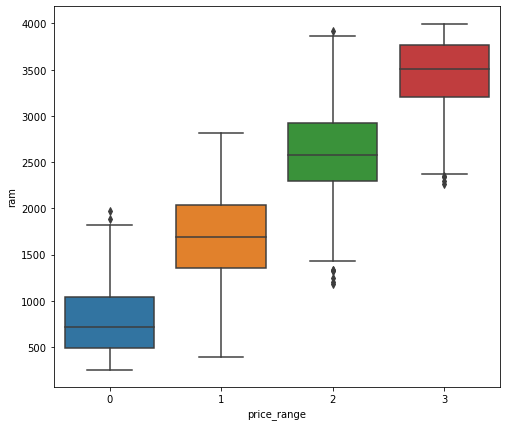

In [27]:
sns.pointplot(y='ram',x='price_range',data=df);
plt.show()
plt.subplots(figsize=(8,7))
sns.boxplot(df['price_range'],df['ram']);

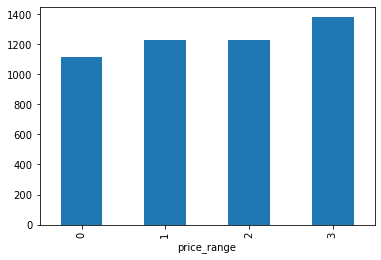

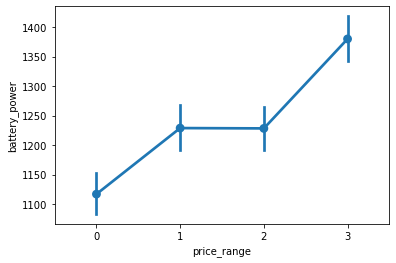

In [28]:
df.groupby('price_range')['battery_power'].mean().plot(kind='bar');
plt.show()
sns.pointplot(y='battery_power',x='price_range',data=df);

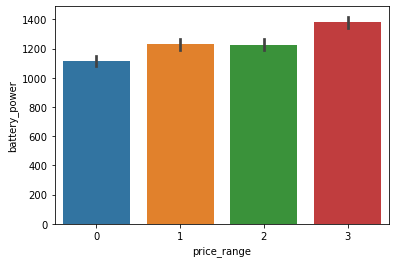

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

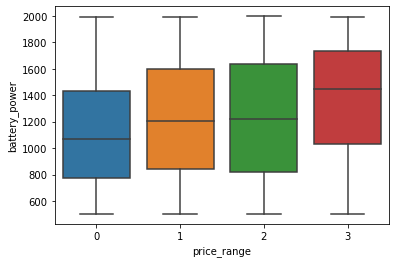

In [56]:
sns.barplot(df['price_range'],df['battery_power'])
#Battery power does increase the price of phones
plt.show()
sns.boxplot(df['price_range'],df['battery_power'])

In [70]:
blue = pd.crosstab(df['blue'],df['price_range'])

In [71]:
blue

price_range,0,1,2,3
blue,,,,
0,257,255,257,241
1,243,245,243,259


<AxesSubplot:xlabel='blue'>

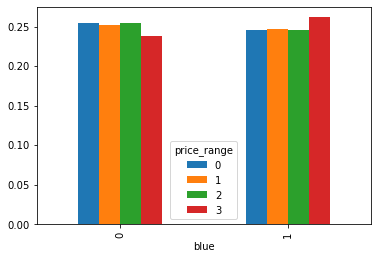

In [72]:
blue.div(blue.sum(1).astype(float),axis=0).plot(kind='bar')

<AxesSubplot:xlabel='price_range', ylabel='blue'>

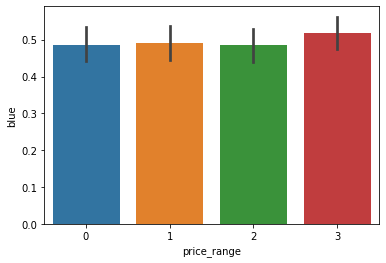

In [73]:
sns.barplot(df['price_range'],df['blue'])
#We can infer that the price is not affected by bluetooth, since bluetooth is there in almost every range of phone

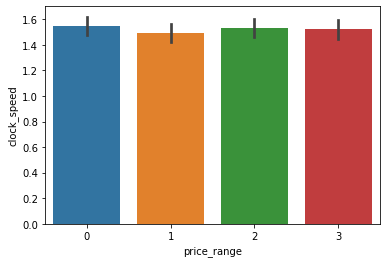

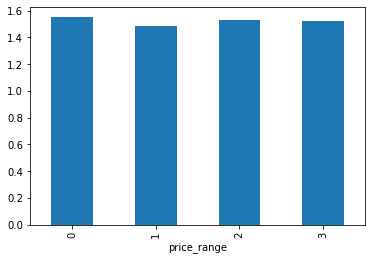

In [74]:
sns.barplot(df['price_range'],df['clock_speed'])
plt.show()
df.groupby('price_range')['clock_speed'].mean().plot(kind='bar')
plt.show()
#clock speed is almost same for all the mobile phones

<AxesSubplot:xlabel='price_range', ylabel='dual_sim'>

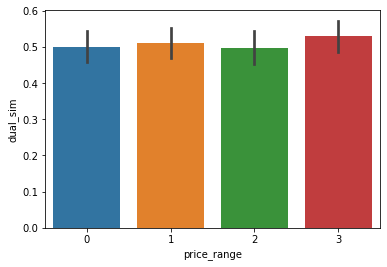

In [75]:
sns.barplot(df['price_range'],df['dual_sim'])
#Dual sim is present in all the phones and it doesn't affect the price

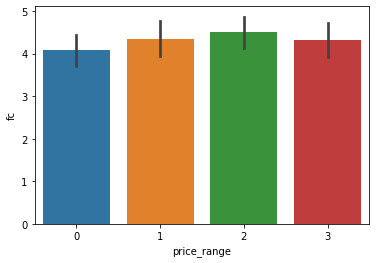

In [29]:
sns.barplot(df['price_range'],df['fc'])
plt.show()
#FC is better for expensive phones

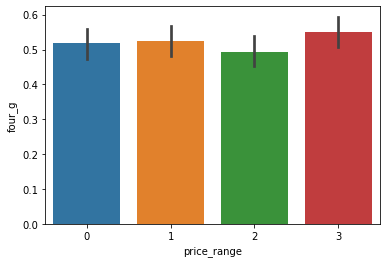

In [30]:
sns.barplot(df['price_range'],df['four_g']);

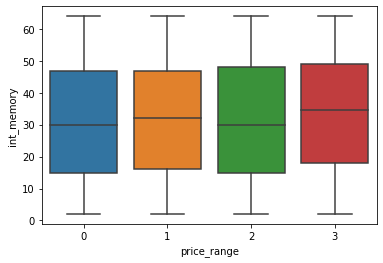

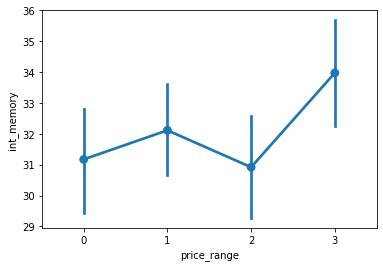

In [34]:
#sns.barplot(df['price_range'],df['int_memory'])
#plt.show
sns.boxplot(df['price_range'],df['int_memory'])
plt.show()
sns.pointplot(df['price_range'],df['int_memory']);

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

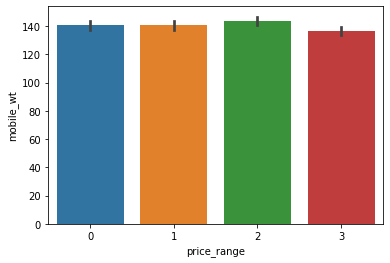

In [83]:
sns.barplot(df['price_range'],df['mobile_wt'])

<AxesSubplot:xlabel='price_range', ylabel='n_cores'>

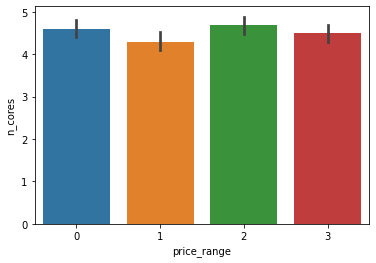

In [84]:
sns.barplot(df['price_range'],df['n_cores'])

<AxesSubplot:xlabel='price_range', ylabel='n_cores'>

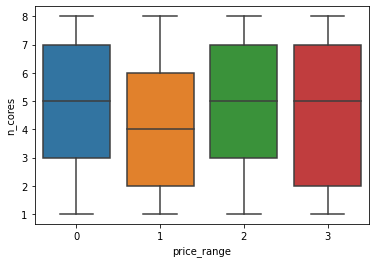

In [85]:
sns.boxplot(df['price_range'],df['n_cores'])

In [87]:
area=df['sc_h']*df['sc_w']

In [88]:
area

0        63
1        51
2        22
3       128
4        16
       ... 
1995     52
1996    110
1997      9
1998    180
1999     76
Length: 2000, dtype: int64

Categorical columns:
blue
clock speed
dual sim
four_g
n_cores
three_g
touch_screen
wifi

In [36]:
matrix = df.corr()

In [92]:
matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


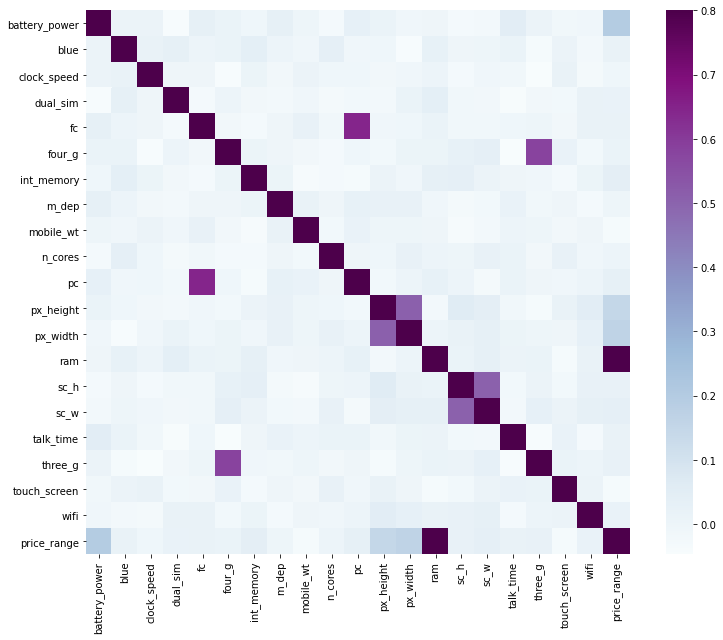

In [38]:
plt.subplots(figsize=(13,10))
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu');

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [104]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [44]:
X=df.drop('price_range',1)
y = df['price_range']

In [109]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.2,random_state=42)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1
240,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
692,781,0,1.1,0,2,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,0,1
420,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1294,589,1,0.5,0,1,1,59,0.7,146,8,4,759,1858,362,16,10,6,1,1,1
860,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1
1459,1927,0,0.9,1,3,0,11,0.4,190,8,12,491,1506,2916,16,11,18,0,1,1


In [120]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_cv = sc.fit_transform(x_cv)

In [121]:
x_train

array([[ 1.54835969, -0.98142253, -1.23622976, ...,  0.55713671,
         0.9900495 ,  1.00250313],
       [-1.3795348 ,  1.01892912,  0.83711156, ...,  0.55713671,
         0.9900495 ,  1.00250313],
       [-0.01091435, -0.98142253, -0.74838475, ...,  0.55713671,
        -1.0100505 ,  1.00250313],
       ...,
       [ 1.33500924,  1.01892912, -1.23622976, ...,  0.55713671,
        -1.0100505 ,  1.00250313],
       [ 1.55743843, -0.98142253, -0.74838475, ..., -1.79489161,
         0.9900495 ,  1.00250313],
       [-1.37499543,  1.01892912, -1.11426851, ...,  0.55713671,
        -1.0100505 , -0.99750312]])

In [161]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_cv)
print('Accuracy of Logistic Regression: ',accuracy_score(y_cv,pred)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of Logistic Regression:  95.25
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.98      0.92      0.95        97
           2       0.90      0.91      0.91        91
           3       0.93      0.99      0.96       105

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

[[105   0   0   0]
 [  2  89   0   0]
 [  0   8  83   1]
 [  0   0   8 104]]


In [101]:
model = LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_cv)
print('Accuracy of Linear Regression: ',model.score(x_cv,y_cv)*100)

Accuracy of Linear Regression:  92.00745047335323


In [77]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)
pred=model.predict(x_cv)
print('Accuracy of KNeighborsClassifier: ',accuracy_score(y_cv,pred)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of KNeighborsClassifier:  55.50000000000001
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       120
           1       0.42      0.40      0.41        95
           2       0.43      0.38      0.41       105
           3       0.56      0.79      0.66        80

    accuracy                           0.56       400
   macro avg       0.55      0.56      0.55       400
weighted avg       0.56      0.56      0.55       400

[[81 20  4  0]
 [28 38 22  3]
 [10 28 40 14]
 [ 1  9 39 63]]


In [90]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_cv)
print('Accuracy of DecisionTreeClassifier: ',model.score(x_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of DecisionTreeClassifier:  84.0
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        98
           1       0.90      0.73      0.81       112
           2       0.73      0.78      0.75        86
           3       0.85      0.91      0.88       104

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

[[92 13  0  0]
 [ 6 82  3  0]
 [ 0 16 67  9]
 [ 0  1 16 95]]


In [91]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_cv)
print('Accuracy of RandomForestClassifier: ',model.score(x_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of RandomForestClassifier:  88.0
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       107
           1       0.87      0.86      0.86        92
           2       0.83      0.78      0.80        98
           3       0.86      0.93      0.89       103

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

[[101   4   0   0]
 [  6  79   6   0]
 [  0   9  76   7]
 [  0   0  16  96]]


In [93]:
model = SVC()
model.fit(x_train,y_train)
pred=model.predict(x_cv)
print('Accuracy of Support Vector Machine: ',model.score(x_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of Support Vector Machine:  88.25
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       108
           1       0.89      0.81      0.85       100
           2       0.80      0.82      0.81        90
           3       0.88      0.96      0.92       102

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

[[100   5   0   0]
 [  8  81   2   0]
 [  0  14  74   4]
 [  0   0  14  98]]


In [94]:
model = GaussianNB()
model.fit(x_train,y_train)
pred=model.predict(x_cv)
print('Accuracy of Gaussian Naive Bayes: ',model.score(x_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of Gaussian Naive Bayes:  80.5
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       112
           1       0.68      0.79      0.73        78
           2       0.77      0.64      0.70       111
           3       0.79      0.90      0.84        99

    accuracy                           0.81       400
   macro avg       0.80      0.81      0.80       400
weighted avg       0.81      0.81      0.80       400

[[100   5   0   0]
 [ 12  62  17   0]
 [  0  11  71  10]
 [  0   0  23  89]]


In [96]:
model =  BernoulliNB()
model.fit(x_train,y_train)
pred=model.predict(x_cv)
print('Accuracy of  Bernoulli Naive Bayes: ',model.score(x_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of  Bernoulli Naive Bayes:  58.25
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       110
           1       0.38      0.44      0.41        79
           2       0.60      0.50      0.55       109
           3       0.64      0.71      0.67       102

    accuracy                           0.58       400
   macro avg       0.58      0.57      0.57       400
weighted avg       0.59      0.58      0.58       400

[[71 34  0  0]
 [38 35 14  4]
 [ 1 10 55 26]
 [ 0  0 40 72]]


In [97]:
model =  GradientBoostingClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_cv)
print('Accuracy of  GradientBoostingClassifier: ',model.score(x_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of  GradientBoostingClassifier:  90.25
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.93      0.88      0.90        97
           2       0.85      0.80      0.83        97
           3       0.86      0.95      0.90       101

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

[[102   3   0   0]
 [  3  85   3   0]
 [  0   9  78   5]
 [  0   0  16  96]]


In [103]:
from sklearn.linear_model import SGDClassifier
model =  SGDClassifier(max_iter=5000, random_state=0)
model.fit(x_train,y_train)
pred=model.predict(x_cv)
print('Accuracy of  GradientBoostingClassifier: ',model.score(x_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of  GradientBoostingClassifier:  76.25
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       100
           1       0.49      0.54      0.51        84
           2       0.62      0.51      0.56       112
           3       0.93      1.00      0.96       104

    accuracy                           0.76       400
   macro avg       0.75      0.76      0.75       400
weighted avg       0.75      0.76      0.76       400

[[ 99   3   3   0]
 [  1  45  45   0]
 [  0  35  57   0]
 [  0   1   7 104]]


In [106]:
df_test = pd.read_csv('test.csv')

In [110]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [111]:
X_test=df_test.drop('id',axis=1)

In [126]:
X_test = sc.fit_transform(X_test)

In [162]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(X_test)
pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,